In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('insurance.csv')

In [6]:
df

,age,male,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


## Dataset Description

age: age of primary beneficiary

Male: insurance contractor gender,1 for male and 0 for female

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance  or number of dependents

smoker: Smoke or not, 1 for smoker and 0 for non-smoker

charges: Individual medical costs billed by health insurance

In [7]:
from sklearn.linear_model import LinearRegression

## Simple Linear Regression

In [8]:
df.shape

(1338, 6)

Using the info, we can see whether there are any null values in the data. If yes, then we have to do some data manipulation.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   male      1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [10]:
df.describe()

,age,male,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\hlee0\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


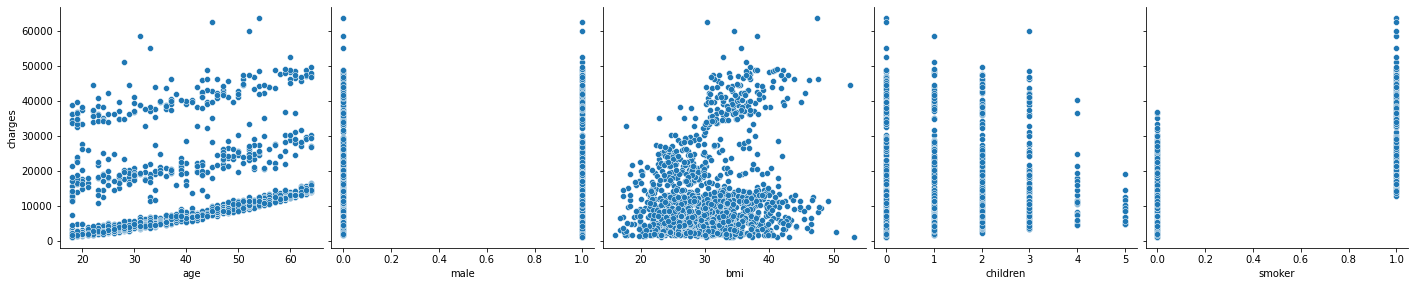

In [12]:
sns.pairplot(df, x_vars=['age', 'male','bmi','children','smoker'], 
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

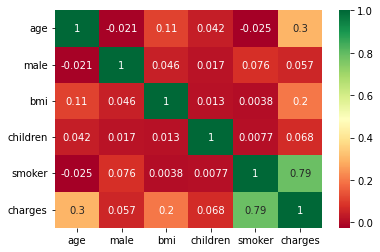

In [13]:
sns.heatmap(df.corr(), cmap="RdYlGn", annot = True)
plt.show()

### Smoker Column most corelate to the charges

## Create X and y

In [14]:
X = df['smoker']
y = df['charges']

## Create Train and Test sets

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [21]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

C:\Users\hlee0\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const      8512.964143
smoker    23946.493045
dtype: float64

In [23]:
const = lr.params[0]
smoker_param = lr.params[1]
smoker_param

23946.49304498865

In [19]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1465.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          1.60e-193
Time:                        15:19:36   Log-Likelihood:                -9688.1
No. Observations:                 936   AIC:                         1.938e+04
Df Residuals:                     934   BIC:                         1.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8512.9641    275.884     30.857      0.000    7971.539    9054.389
smoker      2.395e+04    625.647     38.275      0.000    2.27e+04    2.52e+04
==============================================================================
Omnibus:                      105.411   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.511
Skew:                           0.782   Prob(JB):                     3.12e-36
Kurtosis:                       4.322   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## important data we need to focus are R-squared value, Coefficients, P-value and F-statistic and significance

The p-values help determine whether the relationships that you observe in your sample also exist in the larger population.


Coefficient is 8512 and its p value is 0. That means its statistically significant because its p-value is greater than usual significance level of 0.05

R-squared value is 0.611 which means that 61% of the charges can be explained by smoker

F-statistic has a extreamly low p value, which means that the model fir is significant.

In this example, the equation will be

## Charges = 23946.493045 * (smoker) + 8512


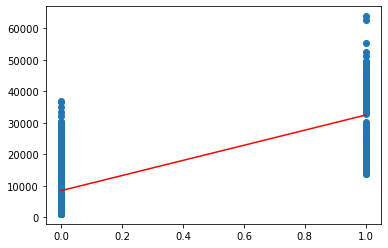

In [25]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, const + smoker_param *X_train, 'r')
plt.show()

## Let's try again with Multiple Linear Regression |

In [43]:
X = df[['bmi', 'age', 'smoker', 'children', 'male']]
y = df['charges']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 42)

In [46]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()
lmodel.fit(X_train,y_train)

LinearRegression()

In [47]:
#When we have 1D array we can change it with below code
#https://stackoverflow.com/questions/58663739/reshape-your-data-either-using-array-reshape-1-1-if-your-data-has-a-single-fe
#lmodel.fit(X_train.values.reshape(-1,1),y_train)
#lmodel.coef_
#lmodel.intercept_

In [48]:
y_pred = lmodel.predict(X_test)
y_pred

array([ 8504.25952786,  6897.83941087, 36805.01178274,  9525.01640181,
       26834.15783554, 11236.53827843,   -56.51533813, 16996.53931939,
         558.86901551, 11292.49638115, 28504.83781808,  9398.41804442,
        5353.29915879, 38679.23753917, 40572.74207294, 37372.20787154,
       15387.38620563, 36033.31348368,  9292.40371143, 31304.88883148,
        4274.20100087, 10592.29487706,  2708.68730205,  6493.02810907,
       11227.74003336, 12498.97075764, 14877.16806499,  5963.85891638,
        9503.12017865,  2360.10282672,  9434.17913244, 12999.67895742,
        4585.98098388,  3265.96837276,  4840.89651399, 12653.62349137,
        2194.59265213,  9123.3897013 , 33175.85413453, 32812.24167496,
        4132.88277765,  4243.29138982, 14495.05758702, 11538.30865769,
        9023.27584285, 12650.54437942,  5036.97193595,  3406.53561573,
       35766.6625433 ,  9379.5276352 , 16062.93310871,  2535.59415356,
       12177.97650916,  1021.65843332, 13742.82492927, 12262.32230678,
      

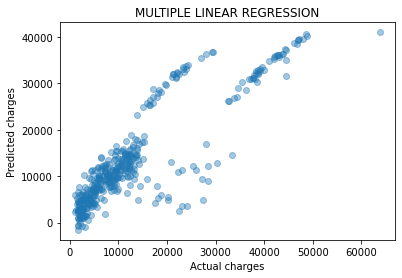

In [49]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

## We can find coefficiency visually in this way

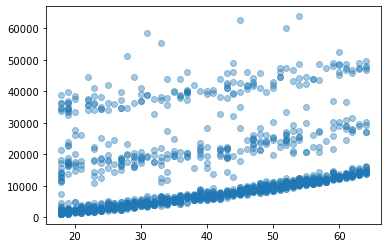

In [55]:
#relationship between charge and age
plt.scatter(df['age'], df['charges'], alpha=0.4)
plt.show()

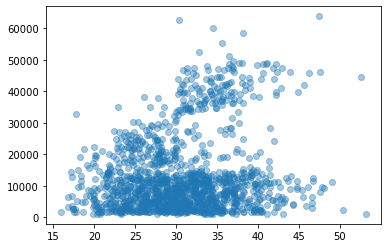

In [56]:
#relationship between charge and bmi
plt.scatter(df['bmi'], df['charges'], alpha=0.4)
plt.show()

## age seems more related with charges than BMI

## How can we check accuracy of model? 

In [57]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score 

print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred))))
print("R2 Score : %.2f" %r2_score(y_test,y_pred))

Mean Absolute Error (MAE): 4171.013084093709
Mean Squared Error (MSE): 34003912.39316076
Root Mean Squared Error (RMSE): 5831.287370140556
R2 Score : 0.77


## means that 77% of charges can be explained with those 5 categories